# Degrees of Influence: Parental Education's Impact on University Dropout Rates
### STAT 201 Project

## Introduction

Higher education institutions are constantly striving to improve student retention and academic success. For this purpose, a comprehensive dataset has been collected from various students in Portugese universities, in an effort to decrease the failure and dropout rate of students (M.V.Martins). The data includes a large number of students with numerous variables that describe each student's unique personal background and their success or failure at the institution. Our project seeks to investigate a specific aspect of this challenge, namely whether the dropout rate among students whose parents **have not** received higher-level education exceeds that of students whose parents **have** attained such educational qualifications. 

#### Background:
A main motivation for this investigation is from a paper by Muthami that examines the relationship between parents’ socio-economic status and students’ dropout rates in secondary schools in Kenya. It finds that parents’ education level, occupation, income, and assets have a significant effect on students’ dropout rates. It also reveals that students with parents who have higher education levels are more likely to drop out than those with parents who have lower education levels.

#### Significance:

The significance of this project lies in its potential to shed light on student dropout rates within the context of parental education. If the data uncovers a statistically significant difference between the two groups, it could inform policies and interventions to better support students. A deeper understanding of this relationship can help institutions tailor their support systems and interventions more effectively, potentially levelling the playing field for all students, regardless of their parental educational backgrounds (Sabates).

#### Research Question

**Is the dropout rate of students with parents that recieved higher level education greater than those whose parents have not recieved higher level education?**

- higher level education refers to any education beyond the highschool level
- parents are considered to recieve higher level education as long as **at least one** parent have recived higher level eduction

$H_0: p_1 = p_2$  
$H_a: p_1 > p_2$  
$p_1$: proportion of student dropout with parents that recieved higher level education  
$p_2$: proportion of student dropout with parents that have **not** recieved higher level education

Hypothesis testing will be conducted with $\alpha = 0.05$.

#### Variables of Interest:

Mother's and Father's qualifications, Admission grade. We will also filter students based on variables such as `Educational special needs`, `Tuition fees up to date`, `Daytime/evening attendance` and `Marital Status`.


## Preliminary Analysis

This section will include:
- Retrieving  data from UCI database and importing it into R
- Wrangling and cleaning the data to get a tidy dataset
- Computing the point estimates of the parameter of interest and putting in table for observation
- Plotting relevant data
    - Classifying parents' education levels
    - Calculating relative dropout rates

In [9]:
# Constants
DATASET_URL <- "https://raw.githubusercontent.com/MehrshadEsm/stat-201-project/main/data.csv"
DATA_FIELDS <- c("Mother's qualification", "Father's qualification", "Educational special needs", "Daytime/evening attendance\t", "Tuition fees up to date", "Marital status", "Admission grade") 

In [10]:
# Load liraries and set seed
set.seed(1234)
library(tidyverse)
library(tidymodels)
library(infer)
library(ggplot2)

## Reading and Cleaning Data

The `Target` variable describes 3 possible outcomes for students - "Graduate," "Dropout," or staying "Enrolled." This analysis will specifically focus on the proportion of students who have dropped out.

Moreover, the variables `Mother's qualification` and `Father's qualification` describe the parents' education level, where each number corresponds to the specific education experience (details [here](#Wrangling-and-Visualizing-Data)). Note: the order of these values is arbitrary, and it does not indicate the education level!

In addition to the parental education level, it is equally important to consider other variables that might influence the student dropout rates. Variables such as `Educational special needs`, `Tuition fees up to date`, `Daytime/evening attendance` and `Marital Status` are critical factors that can directly influence the student dropout rates. To elaborate further on this topic, these variables can affect the data in different ways:

- Educational special needs: Students that require special care can cause outliers in the dataset.
- Tuition fees up to date: Reflect the financial status of the students.
- Daytime/evening attendance: Indicates the quality of education students ge; keeping it constant for fair comparison.
- Marital Status: Can cause significant variability in students' lives - single students being the majority and the other students statuses being the outliers.

To minimize the bias cause by other factors, we will filter our population based on a specific character of a subset of students. Moreover, the admission grade of the student is also the significant variable that can provide further insights into our investigation.

In [11]:
# load data from url
student_data_raw <- read_delim(DATASET_URL, delim = ";")

# select target columns
student_data <- 
    student_data_raw |>
    select(Target, all_of(DATA_FIELDS))

head(student_data)
cat("[Table 1] Unwrangled Student Data with Relevant Variables")

Rows: 4424 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): Target
dbl (36): Marital status, Application mode, Application order, Course, Dayti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Target,Mother's qualification,Father's qualification,Educational special needs,Daytime/evening attendance,Tuition fees up to date,Marital status,Admission grade
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dropout,19,12,0,1,1,1,127.3
Graduate,1,3,0,1,0,1,142.5
Dropout,37,37,0,1,0,1,124.8
Graduate,38,37,0,1,1,1,119.6
Graduate,37,38,0,0,1,2,141.5
Graduate,37,37,0,0,1,2,114.8


[Table 1] Unwrangled Student Data with Relevant Variables

## Wrangling and Visualizing Data 

For the purpose of the analysis, we need to classify parents' education level into two distinct categories - those who have received the higher education, and those who have not received the higher education. To classify this way, we use the UCI dataset description, and we classify the education levels in numerical way as follows:


- **Recieved Higher Education:**  
**2** - Bachelor's Degree, 
**3** - Degree, 
**4** - Master's, 
**5** - Doctorate, 
**22** - Technical-professional course, 
**40** - degree (1st cycle), 
**41** - Specialized higher studies course, 
**42** - Professional higher technical course, 
**43** - Master (2nd cycle), 
**44** - Doctorate (3rd cycle),
**39** - Technological specialization course.

- **Have Not Recieved Higher Education:**  
**1** - Secondary Education, 
**9** - 12th Year of Schooling - Not Completed,
**10** - 11th Year of Schooling - Not Completed, 
**11** - 7th Year, 
**12** - 11th Year of Schooling,
**14** - 10th Year of Schooling 18, 
**19** - Basic Education 3rd Cycle (9th/10th/11th Year), 
**26** - 7th year of schooling, 
**27** - 2nd cycle of the general high school course, 
**29** - 9th Year of Schooling - Not Completed, 
**30** - 8th year of schooling, 
**35** - Can't read or write, 
**36** - Can read without having a 4th year of schooling, 
**37** - Basic education 1st cycle (4th/5th year), 
**38** - Basic Education 2nd Cycle (6th/7th/8th Year). 

- **Outliers (ignored)**:  
**34** - Unknown , 
**6** - Frequency of Higher Education 


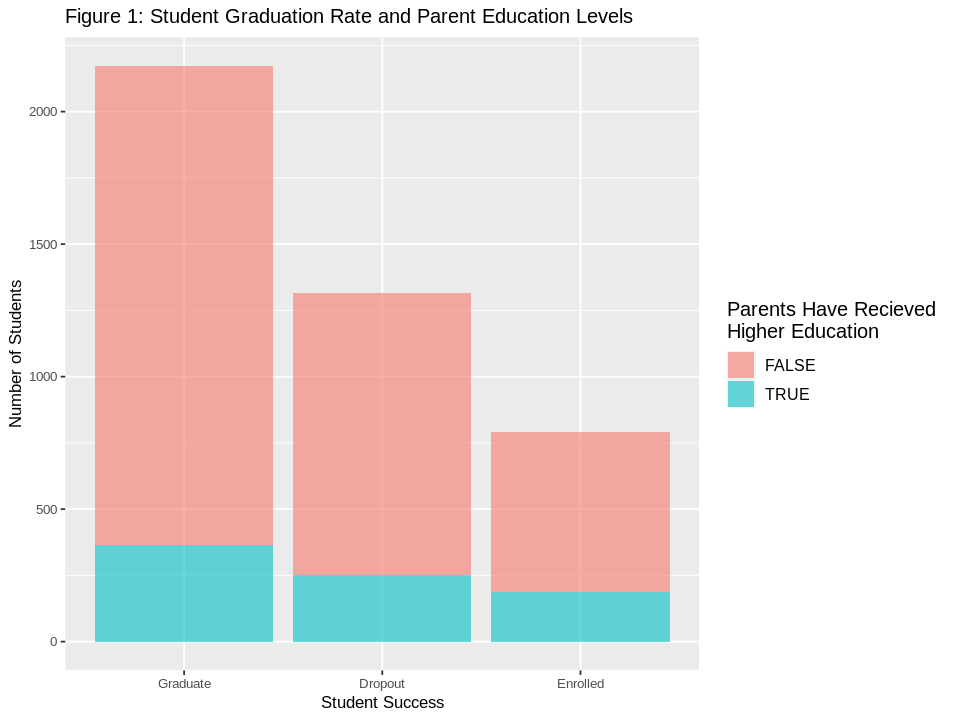

In [12]:
higher_edu = c(2, 3, 4, 5, 22, 40, 41, 42, 43, 44, 39)
not_higher_edu = c(1, 9, 10, 11, 12, 14, 19, 26, 27, 29, 30, 35, 36, 37, 38)
outliers = c(34, 6)

# removing data where parents' education level are outliers
student_data_edu_unfiltered <- 
    student_data |>
    filter(!(`Mother's qualification` %in%  outliers | `Father's qualification` %in%  outliers)) |>
    mutate(one_higher_edu  = ((`Mother's qualification` %in%  higher_edu) | (`Father's qualification` %in%  higher_edu)),
           both_higher_edu = ((`Mother's qualification` %in%  higher_edu) & (`Father's qualification` %in%  higher_edu)))

# Arranging Data
arranged_data <-
    student_data_edu_unfiltered %>% 
    group_by(Target) |>
    mutate(n = n())

options(repr.plot.width = 8, repr.plot.height = 6)
# Plotting Data
education_summary_plot <- 
    arranged_data |>
    ggplot(aes(x = reorder(Target, -n), fill = one_higher_edu)) +
      geom_bar(alpha = .6) +
      xlab("Student Success") +
      ylab("Number of Students") +
      labs(fill = "Parents Have Recieved\nHigher Education") +
      theme(text = element_text(size = 12)) + 
      ggtitle("Figure 1: Student Graduation Rate and Parent Education Levels") +
      theme(axis.title = element_text(size = 10), axis.text = element_text(size = 8), plot.title = element_text(size = 12))

education_summary_plot 

As observed, a majority of the the students do not have parents that are educated, regardless if they drop out or not. The majority of students either graduate or are enrolled. However, students that dropout still occupy a significant proportion of the sample, indicating that student dropout is an ongoing problem. For our analysis, we will also focus specifically on the students who dropped out, and "Graduate" and "Enrolled" will be considered one group.  We will also calculate the specific proportions to better understand the educational disparity.

## Filtering Data

To minimize the bias caused by other factors, we will filter the data further - considering only students that don't require special education assistance, have paid off all their tuition fees, have attended day school, and whose marital stats is 'single'. These categorical values are represented numerically within the dataset as follows:

- Educational special needs: 1 – yes, **0 – no**
- Tuition fees up to date: **1 – yes**, 0 – no
- Daytime/evening attendance: **1 – Daytime**, 0 – Evening
- Marital Status: **1 – single**, 2 – married, 3 – widower, 4 – divorced, 5 – facto union, 6 – legally separated

In [13]:
# filtering the data considering students that satisfy previously described criteria
student_data_edu <-
    student_data_edu_unfiltered |>
    filter(`Educational special needs` == 0 &
           `Tuition fees up to date` == 1 &
           `Daytime/evening attendance\t` == 1 &
           `Marital status` == 1) |>
    select(-`Educational special needs`, -`Daytime/evening attendance\t`, -`Marital status`, -`Tuition fees up to date`)

head(student_data_edu)
cat("[Table 2] Summary of Student Dropout Rates with Classification")

Target,Mother's qualification,Father's qualification,Admission grade,one_higher_edu,both_higher_edu
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Dropout,19,12,127.3,FALSE,FALSE
Graduate,38,37,119.6,FALSE,FALSE
Graduate,19,38,128.4,FALSE,FALSE
Graduate,1,1,129.3,FALSE,FALSE
Graduate,38,19,130.6,FALSE,FALSE
Graduate,19,38,119.3,FALSE,FALSE


[Table 2] Summary of Student Dropout Rates with Classification

## Summary of Data

Furthermore, we summarize the data by calculating the point estimates of the dropout rates. Since the education level is classified as a random binomial value, and the sample size for each category is greater than 10, we will apply the Central Limit Theorem to estimate the standard deviation for both populations as follows:
$$\hat{p}\sim N\left(p, \sqrt{\frac{p(1-p)}{n}}\right).$$
Using this, we also calculate the 95% confidence interval for our sample.

In [14]:
# creating the proportion table with the standard deviation
n <- nrow(student_data_edu)

# calculating point estimates for each category: 
# proportions of dropout, sizes, standard deviations, and mean admission grades for students within that category

student_dropout_props_one <-
    student_data_edu |>
    group_by(one_higher_edu) |>
    summarize(`Proportion of Dropout` = sum(Target == "Dropout") / n(),
              Size = n(), 
              `Standard Deviation` = sqrt(`Proportion of Dropout` * (1 - `Proportion of Dropout`) / n),
              lower_ci = `Proportion of Dropout` + qnorm(0.025) * `Standard Deviation`,
              upper_ci = `Proportion of Dropout` + qnorm(0.975) * `Standard Deviation`,
              `Mean Admission Grade` = mean(`Admission grade`))

student_dropout_props_both <-
    student_data_edu |>
    group_by(both_higher_edu) |>
    summarize(`Proportion of Dropout` = sum(Target == "Dropout") / n(),
              Size = n(), 
              `Standard Deviation` = sqrt(`Proportion of Dropout` * (1 - `Proportion of Dropout`) / n),
              lower_ci = `Proportion of Dropout` + qnorm(0.025) * `Standard Deviation`,
              upper_ci = `Proportion of Dropout` + qnorm(0.975) * `Standard Deviation`,
              `Mean Admission Grade` = mean(`Admission grade`))

student_dropout_props_one
cat("[Table 3] Summary Table of Dropout Proportions for Students with at Least One Higher-Educated Parent \n\n\n\n")


student_dropout_props_both
cat("[Table 4] Summary Table of Dropout Proportions for Students with Both Higher-Educated Parents \n\n\n\n")

one_higher_edu,Proportion of Dropout,Size,Standard Deviation,lower_ci,upper_ci,Mean Admission Grade
<lgl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.2102748,2511,0.007261817,0.1960419,0.2245077,126.8448
TRUE,0.2351097,638,0.007556985,0.2202983,0.2499211,129.7033


[Table 3] Summary Table of Dropout Proportions for Students with at Least One Higher-Educated Parent 





both_higher_edu,Proportion of Dropout,Size,Standard Deviation,lower_ci,upper_ci,Mean Admission Grade
<lgl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.2115123,2936,0.007277445,0.1972487,0.2257758,127.0028
TRUE,0.2676056,213,0.007889215,0.2521431,0.2830682,133.2291


[Table 4] Summary Table of Dropout Proportions for Students with Both Higher-Educated Parents 





Although we have generated two tables, we will primarily focus on the case with **at least one higher-educated parent**. The second table is kept only for the comparison and future analysis purposes. 

The summarized data shows promising initial results. At first glance, our summarized point estimates suggest that the students with parents who have received higher education are more likely to drop out. In addition, the mean admission grade is higher in the group with higher groupout rates. This may imply that academic performance is not the sole factor contributing to the student dropout. Some potential causes could include the following:
- These students may face more pressure from their parents to excel academically and pursue prestigious careers, which can lead to stress, anxiety, and burnout. (Archambault)
- They may have more opportunities and resources to explore alternative paths of education or employment, such as online courses, entrepreneurship, or travel.
- They may have higher expectations of themselves and their schools, and feel dissatisfied or bored with the quality or relevance of their education.


## Visualize Data

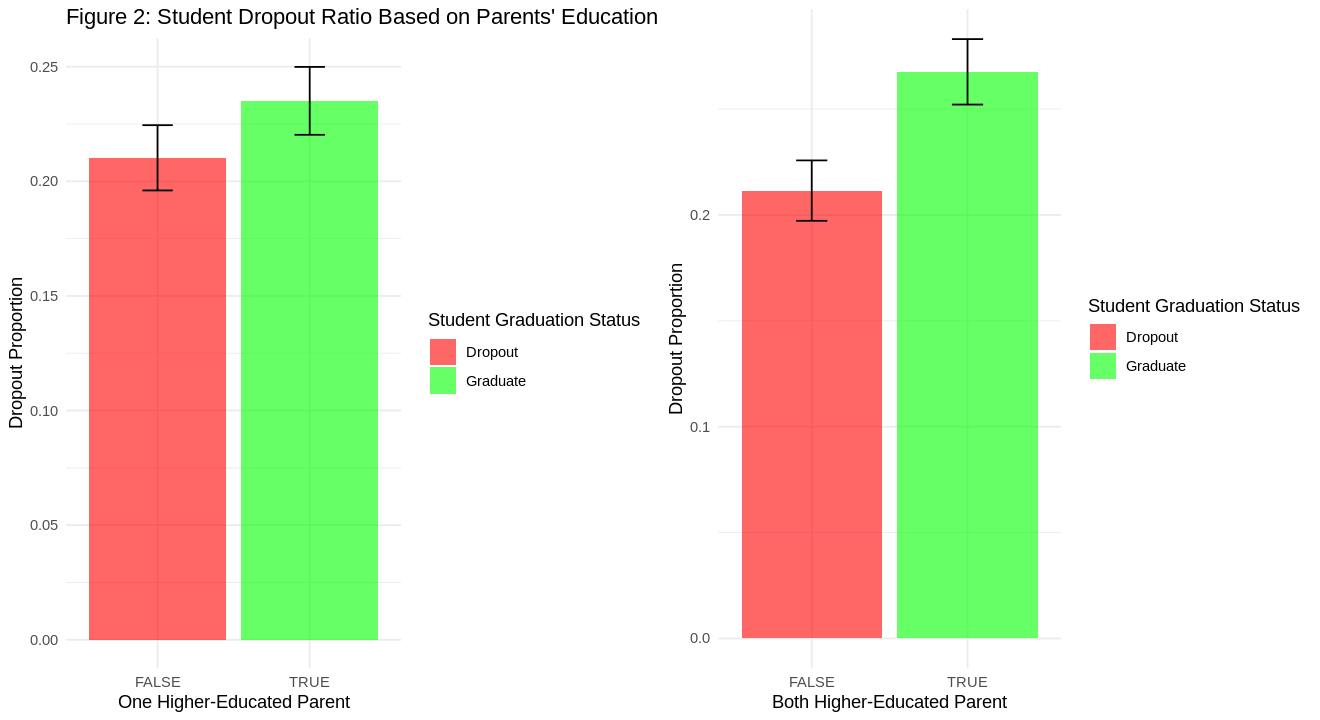

In [16]:
library(gridExtra) # for side-by-side plot

options(repr.plot.width = 11, repr.plot.height = 6)

plot_one_higher_ed_parent <- ggplot(data = student_dropout_props_one, aes(x = factor(one_higher_edu), y = `Proportion of Dropout`, fill = factor(one_higher_edu))) +
  geom_bar(stat = "identity", alpha = .6) +
  geom_errorbar(aes(ymin = lower_ci, ymax = upper_ci),
                    size = 0.5, color = "black", width=.2) +
  labs(title = "Figure 2: Student Dropout Ratio Based on Parents' Education",
       x = "One Higher-Educated Parent",
       y = "Dropout Proportion") +
  scale_fill_manual(values = c("TRUE" = "green", "FALSE" = "red"), name = "Student Graduation Status", labels = c("Dropout", "Graduate")) +
  theme_minimal()

plot_both_higher_ed_parent <- ggplot(data = student_dropout_props_both, aes(x = factor(both_higher_edu), y = `Proportion of Dropout`, fill = factor(both_higher_edu))) +
  geom_bar(stat = "identity", alpha = .6) +
    geom_errorbar(aes(ymin = lower_ci, ymax = upper_ci),
                    size = 0.5, color = "black", width=.2) +
  labs(x = "Both Higher-Educated Parent",
       y = "Dropout Proportion") +
  scale_fill_manual(values = c("TRUE" = "green", "FALSE" = "red"), name = "Student Graduation Status", labels = c("Dropout", "Graduate")) +
  theme_minimal()

arranged_plots <- grid.arrange(plot_one_higher_ed_parent, plot_both_higher_ed_parent, ncol = 2)

## Methods and Results

This report's credibility lies in its plan to use robust statistical methods, such as bootstrapping for confidence intervals, ensuring statistically significant conclusions. Moreover, it benefits from a comprehensive dataset without missing values, suitable for two-sample z-tests, enhancing the analysis's validity and reliability. Additionally, the report aligns with existing research in the field of education, increasing its generalizability to the specific population. The data source, supported by a government grant and publicly available, further bolsters its validity.

From our preliminary analysis, we have discovered that students with more educated parents have a higher dropout rate. However, the plots and estimates that we produced are not sufficient to provide a conclusive answer, as they do not account for the uncertainty and variability inherent in the data. To address this gap, we should provide measures of confidence and significance for our estimates, such as confidence intervals and p-values. These measures will help us quantify the margin of error and the probability of obtaining the observed results by chance, respectively.

### Analysis Plan

Our analysis will involve bootstrapping to estimate the sampling distribution of dropout rates for two populations. We'll visualize this distribution to understand its characteristics, establish confidence intervals, and calculate p-values for hypothesis testing. These steps will help us determine the significance and uncertainty of our findings, enabling us to draw a valid conclusion about the impact of parental education on student dropout rates.

We will also use asymptotics to compare proportions of different populations, utilizing the central limit theorem to perform two-sample z-tests and hypothesis testing, similar to the previous method. Asymptotics is advantageous for large and symmetric datasets, offering efficiency and accuracy. However, it can be misleading or invalid if assumptions are violated or the sample size is too small. To ensure its reliability, we'll verify assumptions and compare results with the bootstrap method for consistency and reasonableness.

### Expectations and Impacts

Through statistical inference, we expect to prove that students with more educated parents have a higher dropout rate than students with less educated parents. Ideally, the results of the study are expected to be statistically significant and reliable, with a low margin of error.
 
This study may reveal how family influences student retention and academic success. It could indicate that parents' education and expectations affect their children's educational decisions and outcomes. This has potential implications for interventions and services that engage parents and families in education, promoting positive parent-student relationships.

### What future questions could this lead to?

How do social-level disparities impact education, and how can educational institutions better involve families to support student success?

How does parental education affect student motivation, engagement, and satisfaction in higher education?

## References

Archambault, I., Janosz, M., Olivier, E., & Dupéré, V. (2022). Student engagement and school dropout: Theories, evidence, and future directions. SpringerLink. https://link.springer.com/chapter/10.1007/978-3-031-07853-8_16

Martins, M. V., Tolledo, D., Machado, J., Baptista, L. M. T., & Realinho, V. (2021). Early prediction of student’s performance in higher education: a case study. In Trends and Applications in Information Systems and Technologies, vol. 1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

Muthami, S. K., Cheloti, S. K., & Mwania, J. M. (2023). Parents’ socio-economic status as a determinant of students’ dropout. International Journal of Management Studies and Social Science Research. https://ijmsssr.org/paper/IJMSSSR00996.pdf

"Predicting student dropout and academic success." UC Irvine Machine Learning Repository. (2021). https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

Sabates, R., Hunt, F., Westbrook, J., & Akyeampong, K. (2010). School dropout: patterns, causes, changes, and policies. Unesdoc.unesco.org. https://unesdoc.unesco.org/ark:/48223/pf0000190771